# Chapter 4: Multiple Regression Analysis: Inference

## 01. Visualization that proves parameters' sampling distribution is dependent on error term

c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


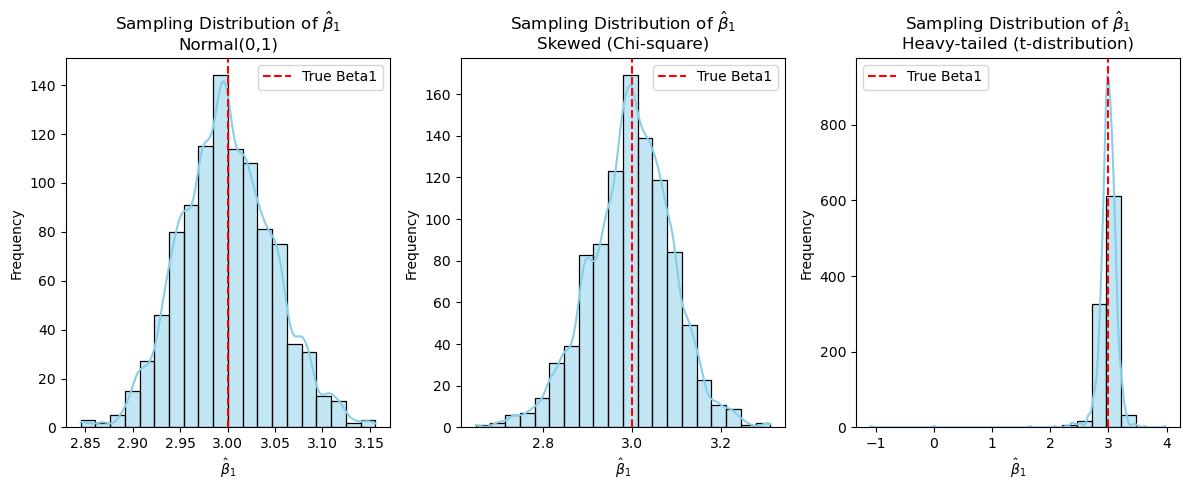

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# True parameters
beta_0 = 2
beta_1 = 3
n = 50  # Sample size
num_simulations = 1000  # Number of samples to generate

# Generate fixed X values
X = np.linspace(0, 10, n)
X_mean = np.mean(X)

# Function to compute OLS estimate of beta_1
def ols_beta1(X, Y):
    return np.sum((X - X_mean) * Y) / np.sum((X - X_mean) ** 2)

# Different error distributions
error_distributions = {
    "Normal(0,1)": lambda size: np.random.normal(0, 1, size),
    "Skewed (Chi-square)": lambda size: np.random.chisquare(df=2, size=size) - 2,  # Center at 0
    "Heavy-tailed (t-distribution)": lambda size: np.random.standard_t(df=2, size=size)  # Heavy tails
}

# Simulate and collect beta_1 estimates
plt.figure(figsize=(12, 5))
for i, (label, error_func) in enumerate(error_distributions.items(), 1):
    beta1_estimates = []
    for _ in range(num_simulations):
        errors = error_func(n)
        Y = beta_0 + beta_1 * X + errors
        beta1_estimates.append(ols_beta1(X, Y))
    
    plt.subplot(1, 3, i)
    sns.histplot(beta1_estimates, bins=20, kde=True, kde_kws={'bw_adjust': 0.5}, color="skyblue")
    plt.axvline(beta_1, color='red', linestyle='dashed', label="True Beta1")
    plt.title(f"Sampling Distribution of $\\hat{{\\beta}}_1$\n{label}")
    plt.xlabel("$\\hat{\\beta}_1$")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


## How the Error Term Affects the Distribution of OLS Estimates

### Mathematical Explanation

In a simple linear regression model:

$$
Y_i = \beta_0 + \beta_1 X_i + u_i
$$

The OLS estimator for $ ( \beta_1 ) $ is:

$$
\hat{\beta}_1 = \frac{\sum (X_i - \bar{X}) Y_i}{\sum (X_i - \bar{X})^2}
$$

Substituting $( Y_i = \beta_0 + \beta_1 X_i + u_i )$:

$$
\hat{\beta}_1 = \beta_1 + \frac{\sum (X_i - \bar{X}) u_i}{\sum (X_i - \bar{X})^2}
$$

Since the estimator is a **linear function of the errors**, its distribution depends on the distribution of the error term \( u_i \):

- If $( u_i \sim N(0, \sigma^2) )$, then $( \hat{\beta}_1 )$ is normally distributed.
- If $( u_i )$ is skewed (e.g., Chi-square distribution), then $( \hat{\beta}_1 )$ inherits that skewness.
- If $( u_i )$ has heavy tails (e.g., t-distribution), $( \hat{\beta}_1 )$ will also exhibit heavy tails.

## Python Simulation

The Python script provided simulates OLS estimates under three different error term distributions:

1. **Normal(0,1)**
2. **Skewed (Chi-square distribution)**
3. **Heavy-tailed (t-distribution with 3 degrees of freedom)**

Each time we sample a dataset, the randomness in $( u_i )$ affects the estimated $( \hat{\beta}_1 )$, shaping its distribution.

The histograms in the output show how the sampling distribution of $( \hat{\beta}_1 )$ varies based on the error distribution.

